In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
%matplotlib inline
os.getcwd()

'C:\\Users\\Om  Ingole\\Favorites'

In [2]:
os.chdir("D:\\Data\\Covid-19 Coursera")     # Changing directory to the location of data files

In [3]:
covid_deaths = pd.read_csv("covid19_deaths_dataset.csv")
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [4]:
covid_deaths_aggregated = covid_deaths.groupby("Country/Region").sum()
covid_deaths_aggregated.drop(["Lat", "Long"], axis = 1, inplace = True)
covid_deaths_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
max_death_rate = []
for country in list(covid_deaths_aggregated.index):
    max_death_rate.append(covid_deaths_aggregated.loc[country].diff().max())
print(max_death_rate)

[7.0, 4.0, 30.0, 4.0, 2.0, 1.0, 13.0, 3.0, 8.0, 30.0, 3.0, 3.0, 1.0, 15.0, 1.0, 5.0, 496.0, 1.0, 1.0, 0.0, 6.0, 6.0, 1.0, 493.0, 1.0, 6.0, 4.0, 2.0, 1.0, 1.0, 0.0, 20.0, 251.0, 0.0, 3.0, 13.0, 1290.0, 26.0, 0.0, 3.0, 5.0, 1.0, 4.0, 8.0, 6.0, 2.0, 18.0, 22.0, 2.0, 1.0, 0.0, 38.0, 208.0, 22.0, 1.0, 1.0, 0.0, 6.0, 1.0, 2.0, 0.0, 43.0, 1440.0, 1.0, 1.0, 1.0, 510.0, 5.0, 10.0, 0.0, 3.0, 2.0, 1.0, 2.0, 2.0, 0.0, 8.0, 23.0, 5.0, 75.0, 60.0, 158.0, 7.0, 220.0, 13.0, 919.0, 2.0, 47.0, 2.0, 5.0, 2.0, 11.0, 10.0, 4.0, 3.0, 0.0, 4.0, 2.0, 4.0, 1.0, 1.0, 6.0, 8.0, 2.0, 0.0, 1.0, 8.0, 1.0, 4.0, 1.0, 1.0, 2.0, 163.0, 10.0, 2.0, 0.0, 1.0, 12.0, 0.0, 0.0, 0.0, 234.0, 4.0, 1.0, 4.0, 7.0, 6.0, 16.0, 2.0, 42.0, 11.0, 0.0, 2.0, 108.0, 50.0, 40.0, 37.0, 2.0, 34.0, 105.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 9.0, 2.0, 54.0, 0.0, 3.0, 2.0, 4.0, 6.0, 8.0, 14.0, 0.0, 961.0, 1.0, 4.0, 1.0, 185.0, 75.0, 1.0, 3.0, 0.0, 6.0, 4.0, 0.0, 2.0, 2.0, 4.0, 127.0, 2612.0, 0.0, 19.0, 9.0, 1172.0, 2.0, 1.0, 6.0, 0.0, 1.0, 0.0, 2.0,

In [6]:
avg_death_rate = []
for country in list(covid_deaths_aggregated.index):
    avg_death_rate.append((covid_deaths_aggregated.loc[country].diff().sum())/100)
print(avg_death_rate)

[0.64, 0.31, 4.5, 0.42, 0.02, 0.03, 2.18, 0.32, 0.93, 5.84, 0.24, 0.11, 0.08, 1.68, 0.07, 0.89, 75.94, 0.02, 0.01, 0.0, 0.59, 0.69, 0.01, 60.06, 0.01, 0.66, 0.43, 0.06, 0.01, 0.01, 0.0, 0.61, 33.1, 0.0, 0.05, 2.27, 46.2, 2.93, 0.0, 0.09, 0.31, 0.06, 0.14, 0.69, 0.61, 0.15, 2.36, 4.52, 0.13, 0.02, 0.0, 3.01, 9.0, 3.92, 0.1, 0.01, 0.0, 0.52, 0.01, 0.03, 0.0, 2.11, 244.1, 0.03, 0.01, 0.06, 66.23, 0.17, 1.4, 0.0, 0.16, 0.07, 0.01, 0.09, 0.08, 0.0, 0.71, 3.12, 0.1, 11.54, 7.92, 60.28, 0.93, 12.32, 2.22, 279.67, 0.08, 4.3, 0.08, 0.25, 0.17, 2.48, 0.22, 0.26, 0.08, 0.0, 0.15, 0.24, 0.16, 0.03, 0.01, 0.45, 0.9, 0.02, 0.0, 0.03, 1.02, 0.01, 0.26, 0.04, 0.01, 0.1, 18.59, 1.16, 0.04, 0.0, 0.07, 1.7, 0.0, 0.0, 0.0, 48.11, 0.19, 0.03, 0.32, 0.58, 0.77, 2.1, 0.11, 3.85, 1.88, 0.0, 0.1, 10.51, 5.68, 6.44, 9.89, 0.1, 7.17, 10.73, 0.0, 0.0, 0.0, 0.0, 0.41, 0.0, 1.62, 0.09, 1.79, 0.0, 0.07, 0.15, 0.23, 0.91, 0.28, 1.03, 0.0, 245.43, 0.07, 0.31, 0.01, 25.86, 17.37, 0.03, 0.06, 0.0, 0.16, 0.54, 0.0, 0.09,

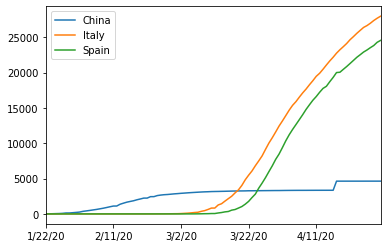

In [7]:
covid_deaths_aggregated.loc['China'].plot()
covid_deaths_aggregated.loc['Italy'].plot()
covid_deaths_aggregated.loc['Spain'].plot()
plt.legend()
plt.show()

In [8]:
covid_19_dataset = pd.read_csv("covid19_Confirmed_dataset.csv")
covid_19_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
covid_19_dataset.shape

(266, 104)

In [10]:
covid_19_dataset.drop(["Lat", "Long"], axis = 1, inplace = True)
covid_19_dataset_aggregated = covid_19_dataset.groupby("Country/Region").sum()
covid_19_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [11]:
covid_19_dataset_aggregated.shape

(187, 100)

In [12]:
net_infections = []
for country in list(covid_19_dataset_aggregated.index):
    net_infections.append(covid_19_dataset_aggregated.loc[country][99] - covid_19_dataset_aggregated.loc[country][0])
print(net_infections)

[2171, 773, 4006, 745, 27, 24, 4428, 2066, 6766, 15452, 1804, 81, 3040, 7667, 81, 14027, 48519, 18, 64, 7, 1110, 1757, 23, 87187, 138, 1506, 645, 151, 11, 121, 122, 1832, 54457, 50, 73, 16023, 83408, 6507, 1, 220, 572, 719, 1275, 2076, 1501, 850, 7682, 9356, 712, 1089, 16, 6972, 24934, 5537, 395, 315, 39, 1689, 100, 131, 18, 4995, 167299, 276, 11, 539, 163009, 2074, 2591, 20, 599, 1495, 205, 82, 81, 11, 771, 2775, 1797, 34863, 10118, 94640, 2085, 20612, 15946, 205463, 422, 14086, 453, 3402, 396, 10773, 799, 4024, 746, 19, 858, 725, 141, 61, 82, 1385, 3784, 9, 128, 37, 6002, 468, 490, 465, 8, 332, 19224, 3897, 95, 38, 322, 4423, 76, 16, 57, 39512, 1479, 14, 719, 1932, 1465, 7738, 2348, 16817, 6532, 8, 266, 36976, 8488, 12877, 25045, 13409, 12240, 106498, 243, 15, 17, 16, 569, 14, 22753, 933, 9009, 11, 124, 16169, 1396, 1429, 601, 5647, 35, 213435, 663, 442, 10, 21092, 29586, 43, 428, 15, 480, 2952, 24, 116, 116, 994, 120204, 1069423, 83, 10406, 12481, 172481, 643, 2039, 333, 270, 344, 6

In [13]:
avg_infections_per_day = []
for country in list(covid_19_dataset_aggregated.index):
    avg_infections_per_day.append((covid_19_dataset_aggregated.loc[country][99] - covid_19_dataset_aggregated.loc[country][0])/100)
print(avg_infections_per_day)

[21.71, 7.73, 40.06, 7.45, 0.27, 0.24, 44.28, 20.66, 67.66, 154.52, 18.04, 0.81, 30.4, 76.67, 0.81, 140.27, 485.19, 0.18, 0.64, 0.07, 11.1, 17.57, 0.23, 871.87, 1.38, 15.06, 6.45, 1.51, 0.11, 1.21, 1.22, 18.32, 544.57, 0.5, 0.73, 160.23, 834.08, 65.07, 0.01, 2.2, 5.72, 7.19, 12.75, 20.76, 15.01, 8.5, 76.82, 93.56, 7.12, 10.89, 0.16, 69.72, 249.34, 55.37, 3.95, 3.15, 0.39, 16.89, 1.0, 1.31, 0.18, 49.95, 1672.99, 2.76, 0.11, 5.39, 1630.09, 20.74, 25.91, 0.2, 5.99, 14.95, 2.05, 0.82, 0.81, 0.11, 7.71, 27.75, 17.97, 348.63, 101.18, 946.4, 20.85, 206.12, 159.46, 2054.63, 4.22, 140.86, 4.53, 34.02, 3.96, 107.73, 7.99, 40.24, 7.46, 0.19, 8.58, 7.25, 1.41, 0.61, 0.82, 13.85, 37.84, 0.09, 1.28, 0.37, 60.02, 4.68, 4.9, 4.65, 0.08, 3.32, 192.24, 38.97, 0.95, 0.38, 3.22, 44.23, 0.76, 0.16, 0.57, 395.12, 14.79, 0.14, 7.19, 19.32, 14.65, 77.38, 23.48, 168.17, 65.32, 0.08, 2.66, 369.76, 84.88, 128.77, 250.45, 134.09, 122.4, 1064.98, 2.43, 0.15, 0.17, 0.16, 5.69, 0.14, 227.53, 9.33, 90.09, 0.11, 1.24,

In [15]:
max_infection_rates = []
for country in list(covid_19_dataset_aggregated.index):
    max_infection_rates.append(covid_19_dataset_aggregated.loc[country].diff().max())
print(max_infection_rates)

[232.0, 34.0, 199.0, 43.0, 5.0, 6.0, 291.0, 134.0, 497.0, 1321.0, 105.0, 7.0, 301.0, 641.0, 12.0, 1485.0, 2454.0, 4.0, 19.0, 1.0, 104.0, 92.0, 7.0, 7502.0, 26.0, 137.0, 41.0, 21.0, 6.0, 45.0, 31.0, 203.0, 2778.0, 31.0, 21.0, 1138.0, 15136.0, 353.0, 1.0, 57.0, 81.0, 37.0, 113.0, 96.0, 63.0, 58.0, 381.0, 391.0, 99.0, 156.0, 5.0, 371.0, 11536.0, 269.0, 32.0, 130.0, 7.0, 134.0, 20.0, 9.0, 5.0, 267.0, 26849.0, 38.0, 5.0, 42.0, 6933.0, 403.0, 156.0, 6.0, 68.0, 167.0, 132.0, 12.0, 10.0, 3.0, 72.0, 210.0, 99.0, 1893.0, 436.0, 3186.0, 91.0, 1515.0, 1131.0, 6557.0, 52.0, 1161.0, 40.0, 264.0, 29.0, 851.0, 289.0, 300.0, 69.0, 3.0, 48.0, 61.0, 17.0, 13.0, 21.0, 90.0, 234.0, 7.0, 14.0, 10.0, 235.0, 190.0, 58.0, 52.0, 2.0, 41.0, 1425.0, 222.0, 12.0, 13.0, 30.0, 281.0, 19.0, 3.0, 14.0, 1346.0, 89.0, 2.0, 69.0, 208.0, 107.0, 386.0, 144.0, 1292.0, 357.0, 5.0, 27.0, 3683.0, 538.0, 545.0, 1516.0, 957.0, 523.0, 7099.0, 22.0, 5.0, 6.0, 4.0, 54.0, 6.0, 1351.0, 87.0, 2379.0, 2.0, 20.0, 1426.0, 114.0, 70.0, 73

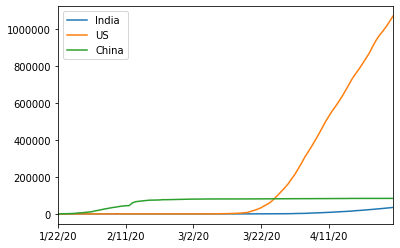

In [17]:
covid_19_dataset_aggregated.loc['India'].plot()
covid_19_dataset_aggregated.loc['US'].plot()
covid_19_dataset_aggregated.loc['China'].plot()
plt.legend()
plt.show()

In [18]:
covid_19_dataset_aggregated["max_infection_rate"] = max_infection_rates
covid_19_dataset_aggregated["net_infections"] = net_infections
covid_19_dataset_aggregated["avg_infections_per_day"] = avg_infections_per_day
covid_19_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate,net_infections,avg_infections_per_day
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,232.0,2171,21.71
Albania,0,0,0,0,0,0,0,0,0,0,...,678,712,726,736,750,766,773,34.0,773,7.73
Algeria,0,0,0,0,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,199.0,4006,40.06
Andorra,0,0,0,0,0,0,0,0,0,0,...,731,738,738,743,743,743,745,43.0,745,7.45
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,26,27,27,27,27,5.0,27,0.27


In [19]:
covid_data = pd.DataFrame(covid_19_dataset_aggregated[["max_infection_rate", "avg_infections_per_day", "net_infections"]])
covid_data.head()

,max_infection_rate,avg_infections_per_day,net_infections
Country/Region,,,
Afghanistan,232.0,21.71,2171
Albania,34.0,7.73,773
Algeria,199.0,40.06,4006
Andorra,43.0,7.45,745
Angola,5.0,0.27,27


In [20]:
development_index = pd.read_csv("worldwide_happiness_report.csv")
development_index.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [23]:
len(covid_data)

187

In [22]:
len(development_index)

156

In [24]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
development_index.drop(useless_cols, axis = 1, inplace = True)
development_index.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [25]:
development_index.set_index("Country or region", inplace = True)
development_index.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [26]:
data = covid_data.join(development_index, how = "inner")
data.head()

,max_infection_rate,avg_infections_per_day,net_infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,21.71,2171,0.350,0.517,0.361,0.000
Albania,34.0,7.73,773,0.947,0.848,0.874,0.383
Algeria,199.0,40.06,4006,1.002,1.160,0.785,0.086
Argentina,291.0,44.28,4428,1.092,1.432,0.881,0.471
Armenia,134.0,20.66,2066,0.850,1.055,0.815,0.283


In [27]:
len(data)

143

In [28]:
data.corr() ## Correlation matrix

,max_infection_rate,avg_infections_per_day,net_infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.772167,0.772167,0.250118,0.191958,0.289263,0.078196
avg_infections_per_day,0.772167,1.000000,1.000000,0.329073,0.241618,0.341890,0.029595
net_infections,0.772167,1.000000,1.000000,0.329073,0.241618,0.341890,0.029595
GDP per capita,0.250118,0.329073,0.329073,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.241618,0.241618,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.341890,0.341890,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.029595,0.029595,0.394603,0.456246,0.427892,1.000000


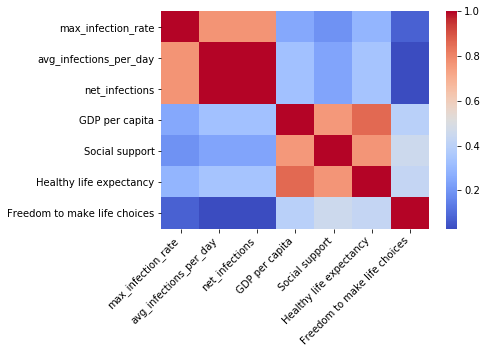

In [64]:
ax = sns.heatmap(data.corr(), cmap = 'coolwarm')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [68]:
## The in-built correlation matrix function .corr() gives a matrix by using the Pearson's Correlation. Below is 
## the code to check whether the function gives the value matching with Pearson's.  

In [75]:
a = []
for i in range(len(data)):
    a.append(np.round((data['GDP per capita'][i] - data['GDP per capita'].mean()), 2))
print(a)

[-0.54, 0.05, 0.11, 0.2, -0.04, 0.48, 0.48, 0.15, 0.47, -0.33, 0.17, 0.46, -0.5, -0.08, -0.12, 0.05, 0.15, 0.11, 0.2, -0.56, -0.85, -0.32, -0.34, 0.47, -0.87, -0.54, 0.27, 0.14, 0.09, -0.62, -0.22, -0.8, 0.14, 0.26, 0.37, 0.49, 0.12, 0.02, 0.02, -0.1, 0.34, -0.56, 0.45, 0.43, 0.16, -0.58, -0.01, 0.48, -0.28, 0.29, -0.09, -0.51, -0.57, -0.25, 0.31, 0.49, -0.14, 0.04, 0.21, 0.15, 0.61, 0.38, 0.4, -0.06, 0.43, -0.06, 0.28, -0.38, -0.01, 0.61, -0.34, -0.13, 0.29, 0.09, -0.82, 0.15, 0.35, 0.72, -0.62, -0.7, 0.33, -0.51, 0.41, -0.32, 0.23, 0.18, -0.21, 0.06, 0.16, -0.09, -0.69, -0.01, -0.45, 0.5, 0.41, -0.2, -0.75, -0.2, 0.09, 0.6, -0.22, 0.26, -0.04, 0.07, -0.09, 0.31, 0.33, 0.79, 0.27, 0.29, -0.53, 0.51, -0.44, 0.11, -0.62, 0.68, 0.35, 0.37, -0.89, 0.07, -0.59, 0.39, 0.06, 0.49, 0.56, -0.27, -0.4, -0.42, 0.16, -0.62, 0.03, 0.29, -0.56, -0.07, 0.61, 0.44, 0.23, -0.15, 0.07, -0.15, -0.61, -0.31, -0.53]


In [76]:
b = []
for i in range(len(data)):
    b.append(np.round((data['max_infection_rate'][i] - data['max_infection_rate'].mean()), 2))
print(b)

[-857.94, -1055.94, -890.94, -798.94, -955.94, -592.94, 231.06, -984.94, -788.94, -448.94, 395.06, 1364.06, -1070.94, -1088.94, -985.94, -997.94, -1082.94, 6412.06, -952.94, -1048.94, -1083.94, -1058.94, -886.94, 1688.06, -1058.94, -1068.94, 48.06, 14046.06, -736.94, -1088.94, -1032.94, -1008.94, -1052.94, -993.94, -1031.94, -698.94, -718.94, 10446.06, -820.94, -1057.94, -955.94, -1080.94, -822.94, 25759.06, -1051.94, -1084.94, -1047.94, 5843.06, -686.94, -933.94, -1021.94, -922.94, -1079.94, -1017.94, -879.94, -990.94, 803.06, -653.94, 2096.06, -998.94, 425.06, 41.06, 5467.06, -1037.94, 71.06, -1049.94, -825.94, -1060.94, -800.94, -789.94, -1020.94, -1086.94, -1041.94, -1028.94, -1072.94, -1076.94, -999.94, -855.94, -1075.94, -1079.94, -854.94, -1031.94, -1037.94, -1087.94, -1048.94, 335.06, -867.94, -1076.94, -1059.94, -808.94, -1070.94, -1086.94, -1075.94, 256.06, -1000.94, -1087.94, -1020.94, -881.94, -982.94, -703.94, 202.06, -732.94, -1062.94, 2593.06, -551.94, -544.94, 426.06, -

In [77]:
c = []
for i in range(len(data)):
    c.append(np.round(a[i]*b[i], 2))
print(c) 

[463.29, -52.8, -98.0, -159.79, 38.24, -284.61, 110.91, -147.74, -370.8, 148.15, 67.16, 627.47, 535.47, 87.12, 118.31, -49.9, -162.44, 705.33, -190.59, 587.41, 921.35, 338.86, 301.56, 793.39, 921.28, 577.23, 12.98, 1966.45, -66.32, 675.14, 227.25, 807.15, -147.41, -258.42, -381.82, -342.48, -86.27, 208.92, -16.42, 105.79, -325.02, 605.33, -370.32, 11076.4, -168.31, 629.27, 10.48, 2804.67, 192.34, -270.84, 91.97, 470.7, 615.57, 254.48, -272.78, -485.56, -112.43, -26.16, 440.17, -149.84, 259.29, 15.6, 2186.82, 62.28, 30.56, 63.0, -231.26, 403.16, 8.01, -481.86, 347.12, 141.3, -302.16, -92.6, 879.81, -161.54, -349.98, -616.28, 667.08, 755.96, -282.13, 526.29, -425.56, 348.14, -241.26, 60.31, 182.27, -64.62, -169.59, 72.8, 738.95, 10.87, 484.17, 128.03, -410.39, 217.59, 765.7, 176.39, -88.46, -422.36, -44.45, -190.56, 42.52, 181.51, 49.67, -168.93, 140.6, -105.02, -153.07, 1742.63, 566.01, 133.14, 441.29, 141.8, 663.36, 228.52, -341.58, -377.38, 905.08, -51.52, 626.54, 3330.62, -61.5, -136

In [78]:
sq_a = [np.round(num**2, 3) for num in a]
print(sq_a)

[0.292, 0.003, 0.012, 0.04, 0.002, 0.23, 0.23, 0.022, 0.221, 0.109, 0.029, 0.212, 0.25, 0.006, 0.014, 0.003, 0.022, 0.012, 0.04, 0.314, 0.722, 0.102, 0.116, 0.221, 0.757, 0.292, 0.073, 0.02, 0.008, 0.384, 0.048, 0.64, 0.02, 0.068, 0.137, 0.24, 0.014, 0.0, 0.0, 0.01, 0.116, 0.314, 0.202, 0.185, 0.026, 0.336, 0.0, 0.23, 0.078, 0.084, 0.008, 0.26, 0.325, 0.062, 0.096, 0.24, 0.02, 0.002, 0.044, 0.022, 0.372, 0.144, 0.16, 0.004, 0.185, 0.004, 0.078, 0.144, 0.0, 0.372, 0.116, 0.017, 0.084, 0.008, 0.672, 0.022, 0.122, 0.518, 0.384, 0.49, 0.109, 0.26, 0.168, 0.102, 0.053, 0.032, 0.044, 0.004, 0.026, 0.008, 0.476, 0.0, 0.202, 0.25, 0.168, 0.04, 0.562, 0.04, 0.008, 0.36, 0.048, 0.068, 0.002, 0.005, 0.008, 0.096, 0.109, 0.624, 0.073, 0.084, 0.281, 0.26, 0.194, 0.012, 0.384, 0.462, 0.122, 0.137, 0.792, 0.005, 0.348, 0.152, 0.004, 0.24, 0.314, 0.073, 0.16, 0.176, 0.026, 0.384, 0.001, 0.084, 0.314, 0.005, 0.372, 0.194, 0.053, 0.022, 0.005, 0.022, 0.372, 0.096, 0.281]


In [79]:
sq_b = [round(num**2) for num in b]
print(sq_b)

[736061.0, 1115009.0, 793774.0, 638305.0, 913821.0, 351578.0, 53389.0, 970107.0, 622426.0, 201547.0, 156072.0, 1860660.0, 1146912.0, 1185790.0, 972078.0, 995884.0, 1172759.0, 41114513.0, 908095.0, 1100275.0, 1174926.0, 1121354.0, 786663.0, 2849547.0, 1121354.0, 1142633.0, 2310.0, 197291802.0, 543081.0, 1185790.0, 1066965.0, 1017960.0, 1108683.0, 987917.0, 1064900.0, 488517.0, 516875.0, 109120170.0, 673942.0, 1119237.0, 913821.0, 1168431.0, 677230.0, 663529172.0, 1106578.0, 1177095.0, 1098178.0, 34141350.0, 471887.0, 872244.0, 1044361.0, 851818.0, 1166270.0, 1036202.0, 774294.0, 981962.0, 644905.0, 427638.0, 4393468.0, 997881.0, 180676.0, 1686.0, 29888745.0, 1077319.0, 5050.0, 1102374.0, 682177.0, 1125594.0, 641505.0, 624005.0, 1042318.0, 1181439.0, 1085639.0, 1058718.0, 1151200.0, 1159800.0, 999880.0, 732633.0, 1157647.0, 1166270.0, 730922.0, 1064900.0, 1077319.0, 1183613.0, 1100275.0, 112265.0, 753320.0, 1159800.0, 1123473.0, 654384.0, 1146912.0, 1181439.0, 1157647.0, 65567.0, 1001881

In [80]:
corr_factor = round(sum(c)/np.sqrt(sum(sq_a)*sum(sq_b)), 2)
corr_factor

0.25

In [81]:
corr_factor == round(data.corr()['max_infection_rate']['GDP per capita'], 2)

True

In [29]:
url3 = "https://www.worldometers.info/world-population/population-by-country/"

In [30]:
html_content = requests.get(url3).text
soup = BeautifulSoup(html_content, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Population by Country (2021) - Worldometer
  </title>
  <meta content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population." name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" siz

In [31]:
# Get the hyperlink reference, title and inner text wriiten for each anchor tag

for link in soup.find_all('a'):
    print("Href: {}".format(link.get('href')))
    print("Title: {}".format(link.get('title')))
    print("Inner text: {}".format(link.text))

Href: /
Title: None
Inner text: 
Href: /coronavirus/
Title: None
Inner text: Coronavirus
Href: /population/
Title: None
Inner text: Population
Href: /
Title: None
Inner text: W
Href: /population/
Title: None
Inner text: Population
Href: /world-population/
Title: None
Inner text: World Population 
Href: /world-population/china-population/
Title: None
Inner text: China
Href: /world-population/india-population/
Title: None
Inner text: India
Href: /world-population/us-population/
Title: None
Inner text: United States
Href: /world-population/indonesia-population/
Title: None
Inner text: Indonesia
Href: /world-population/pakistan-population/
Title: None
Inner text: Pakistan
Href: /world-population/brazil-population/
Title: None
Inner text: Brazil
Href: /world-population/nigeria-population/
Title: None
Inner text: Nigeria
Href: /world-population/bangladesh-population/
Title: None
Inner text: Bangladesh
Href: /world-population/russia-population/
Title: None
Inner text: Russia
Href: /world-popu

In [32]:
table = soup.find('div', attrs = {"class": "table-responsive"})
pop_table = table.find('table', attrs = {"id": "example2"})
pop_table_data = pop_table.tbody.find_all('tr')
pop_table_head = pop_table.thead.find_all('tr')

In [33]:
pop_table_data[0].text

' 1 China 1,439,323,776 0.39 % 5,540,090 153 9,388,211 -348,399 1.7 38 61 % 18.47 % '

In [35]:
pop_table_head[0].text

' # Country (or dependency) Population (2020) Yearly Change Net Change Density (P/Km²) Land Area (Km²) Migrants (net) Fert. Rate Med. Age Urban Pop % World Share '

In [36]:
# Get the headings of all the 
headings = []
for th in pop_table_head[0].find_all("th"):
    headings.append(th.text.replace('\n', ' ').strip())
print(headings)

['#', 'Country (or dependency)', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']


In [37]:
links = pop_table.find_all('a')
Countries = []
for link in links:
    Countries.append(link.text)
print(Countries)

['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico', 'Japan', 'Ethiopia', 'Philippines', 'Egypt', 'Vietnam', 'DR Congo', 'Turkey', 'Iran', 'Germany', 'Thailand', 'United Kingdom', 'France', 'Italy', 'Tanzania', 'South Africa', 'Myanmar', 'Kenya', 'South Korea', 'Colombia', 'Spain', 'Uganda', 'Argentina', 'Algeria', 'Sudan', 'Ukraine', 'Iraq', 'Afghanistan', 'Poland', 'Canada', 'Morocco', 'Saudi Arabia', 'Uzbekistan', 'Peru', 'Angola', 'Malaysia', 'Mozambique', 'Ghana', 'Yemen', 'Nepal', 'Venezuela', 'Madagascar', 'Cameroon', "Côte d'Ivoire", 'North Korea', 'Australia', 'Niger', 'Taiwan', 'Sri Lanka', 'Burkina Faso', 'Mali', 'Romania', 'Malawi', 'Chile', 'Kazakhstan', 'Zambia', 'Guatemala', 'Ecuador', 'Syria', 'Netherlands', 'Senegal', 'Cambodia', 'Chad', 'Somalia', 'Zimbabwe', 'Guinea', 'Rwanda', 'Benin', 'Burundi', 'Tunisia', 'Bolivia', 'Belgium', 'Haiti', 'Cuba', 'South Sudan', 'Dominican Republic', 'Czech Republic (Czech

In [38]:
df = pd.DataFrame()
df['Countries'] = Countries

In [41]:
new_list = []
for row in pop_table_data:
    new_list.append(row.find_all("td")[2].text)
new_list

['1,439,323,776',
 '1,380,004,385',
 '331,002,651',
 '273,523,615',
 '220,892,340',
 '212,559,417',
 '206,139,589',
 '164,689,383',
 '145,934,462',
 '128,932,753',
 '126,476,461',
 '114,963,588',
 '109,581,078',
 '102,334,404',
 '97,338,579',
 '89,561,403',
 '84,339,067',
 '83,992,949',
 '83,783,942',
 '69,799,978',
 '67,886,011',
 '65,273,511',
 '60,461,826',
 '59,734,218',
 '59,308,690',
 '54,409,800',
 '53,771,296',
 '51,269,185',
 '50,882,891',
 '46,754,778',
 '45,741,007',
 '45,195,774',
 '43,851,044',
 '43,849,260',
 '43,733,762',
 '40,222,493',
 '38,928,346',
 '37,846,611',
 '37,742,154',
 '36,910,560',
 '34,813,871',
 '33,469,203',
 '32,971,854',
 '32,866,272',
 '32,365,999',
 '31,255,435',
 '31,072,940',
 '29,825,964',
 '29,136,808',
 '28,435,940',
 '27,691,018',
 '26,545,863',
 '26,378,274',
 '25,778,816',
 '25,499,884',
 '24,206,644',
 '23,816,775',
 '21,413,249',
 '20,903,273',
 '20,250,833',
 '19,237,691',
 '19,129,952',
 '19,116,201',
 '18,776,707',
 '18,383,955',
 '17,91

In [42]:
new_list2 = []
for row in pop_table_data:
    new_list2.append(row.find_all("td")[5].text)
new_list2

['153',
 '464',
 '36',
 '151',
 '287',
 '25',
 '226',
 '1,265',
 '9',
 '66',
 '347',
 '115',
 '368',
 '103',
 '314',
 '40',
 '110',
 '52',
 '240',
 '137',
 '281',
 '119',
 '206',
 '67',
 '49',
 '83',
 '94',
 '527',
 '46',
 '94',
 '229',
 '17',
 '18',
 '25',
 '75',
 '93',
 '60',
 '124',
 '4',
 '83',
 '16',
 '79',
 '26',
 '26',
 '99',
 '40',
 '137',
 '56',
 '203',
 '32',
 '48',
 '56',
 '83',
 '214',
 '3',
 '19',
 '673',
 '341',
 '76',
 '17',
 '84',
 '203',
 '26',
 '7',
 '25',
 '167',
 '71',
 '95',
 '508',
 '87',
 '95',
 '13',
 '25',
 '38',
 '53',
 '525',
 '108',
 '463',
 '76',
 '11',
 '383',
 '414',
 '106',
 '18',
 '225',
 '139',
 '81',
 '115',
 '111',
 '123',
 '25',
 '89',
 '118',
 '107',
 '68',
 '47',
 '109',
 '20',
 '100',
 '400',
 '219',
 '152',
 '111',
 '7,140',
 '32',
 '18',
 '64',
 '4',
 '667',
 '55',
 '34',
 '313',
 '13',
 '8,358',
 '137',
 '18',
 '16',
 '114',
 '15',
 '16',
 '847',
 '100',
 '53',
 '72',
 '8',
 '18',
 '5',
 '58',
 '240',
 '73',
 '123',
 '57',
 '35',
 '20',
 '64',

In [43]:
df['Population'] = new_list
df['Population density'] = new_list2
df.head()

,Countries,Population,Population density
0,China,"1,439,323,776",153
1,India,"1,380,004,385",464
2,United States,"331,002,651",36
3,Indonesia,"273,523,615",151
4,Pakistan,"220,892,340",287


In [44]:
df.sort_values(by = ['Countries'], inplace = True)
df.set_index('Countries', inplace = True)
df.head()

,Population,Population density
Countries,,
Afghanistan,"38,928,346",60
Albania,"2,877,797",105
Algeria,"43,851,044",18
American Samoa,"55,191",276
Andorra,"77,265",164


In [45]:
len(df)

235

In [46]:
data.head()

,max_infection_rate,avg_infections_per_day,net_infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,21.71,2171,0.350,0.517,0.361,0.000
Albania,34.0,7.73,773,0.947,0.848,0.874,0.383
Algeria,199.0,40.06,4006,1.002,1.160,0.785,0.086
Argentina,291.0,44.28,4428,1.092,1.432,0.881,0.471
Armenia,134.0,20.66,2066,0.850,1.055,0.815,0.283


In [47]:
len(data)

143

In [48]:
net_data = pd.merge(df, data, left_index = True, right_index = True)
net_data.head()

,Population,Population density,max_infection_rate,avg_infections_per_day,net_infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,"38,928,346",60,232.0,21.71,2171,0.350,0.517,0.361,0.000
Albania,"2,877,797",105,34.0,7.73,773,0.947,0.848,0.874,0.383
Algeria,"43,851,044",18,199.0,40.06,4006,1.002,1.160,0.785,0.086
Argentina,"45,195,774",17,291.0,44.28,4428,1.092,1.432,0.881,0.471
Armenia,"2,963,243",104,134.0,20.66,2066,0.850,1.055,0.815,0.283


In [49]:
net_data['Population'] = net_data['Population'].str.split(',').str.join('').astype(int)
net_data['Population'].head()

Afghanistan    38928346
Albania         2877797
Algeria        43851044
Argentina      45195774
Armenia         2963243
Name: Population, dtype: int32

In [50]:
net_data['Net infections per million people'] = (10**6) * (net_data['net_infections'] / net_data['Population'])
net_data.head()

,Population,Population density,max_infection_rate,avg_infections_per_day,net_infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Net infections per million people
Afghanistan,38928346,60,232.0,21.71,2171,0.350,0.517,0.361,0.000,55.769130
Albania,2877797,105,34.0,7.73,773,0.947,0.848,0.874,0.383,268.608244
Algeria,43851044,18,199.0,40.06,4006,1.002,1.160,0.785,0.086,91.354724
Argentina,45195774,17,291.0,44.28,4428,1.092,1.432,0.881,0.471,97.973762
Armenia,2963243,104,134.0,20.66,2066,0.850,1.055,0.815,0.283,697.209105


In [51]:
net_data.rename(columns = {'max_infection_rate': 'Maximum infection rate(per day)', 'avg_infections_per_day': 'Average infections per day'}, inplace = True)
net_data.drop(columns = 'net_infections', inplace = True)
net_data.head()

,Population,Population density,Maximum infection rate(per day),Average infections per day,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Net infections per million people
Afghanistan,38928346,60,232.0,21.71,0.350,0.517,0.361,0.000,55.769130
Albania,2877797,105,34.0,7.73,0.947,0.848,0.874,0.383,268.608244
Algeria,43851044,18,199.0,40.06,1.002,1.160,0.785,0.086,91.354724
Argentina,45195774,17,291.0,44.28,1.092,1.432,0.881,0.471,97.973762
Armenia,2963243,104,134.0,20.66,0.850,1.055,0.815,0.283,697.209105


In [52]:
dev_index = net_data[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
dev_index.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,0.350,0.517,0.361,0.000
Albania,0.947,0.848,0.874,0.383
Algeria,1.002,1.160,0.785,0.086
Argentina,1.092,1.432,0.881,0.471
Armenia,0.850,1.055,0.815,0.283


In [53]:
max_inf_rate_vs_dev_index = dev_index.join(net_data['Maximum infection rate(per day)'], how = 'inner')
avg_infections_vs_dev_index = dev_index.join(net_data['Average infections per day'], how = 'inner')
inf_per_capita_vs_dev_index = dev_index.join(net_data['Net infections per million people'], how = 'inner')

In [54]:
max_inf_rate_vs_dev_index.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum infection rate(per day)
Afghanistan,0.350,0.517,0.361,0.000,232.0
Albania,0.947,0.848,0.874,0.383,34.0
Algeria,1.002,1.160,0.785,0.086,199.0
Argentina,1.092,1.432,0.881,0.471,291.0
Armenia,0.850,1.055,0.815,0.283,134.0


In [55]:
max_inf_rate_vs_dev_index.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum infection rate(per day)
GDP per capita,1.000000,0.767286,0.860355,0.389718,0.248187
Social support,0.767286,1.000000,0.767911,0.457708,0.189838
Healthy life expectancy,0.860355,0.767911,1.000000,0.423701,0.287406
Freedom to make life choices,0.389718,0.457708,0.423701,1.000000,0.077468
Maximum infection rate(per day),0.248187,0.189838,0.287406,0.077468,1.000000


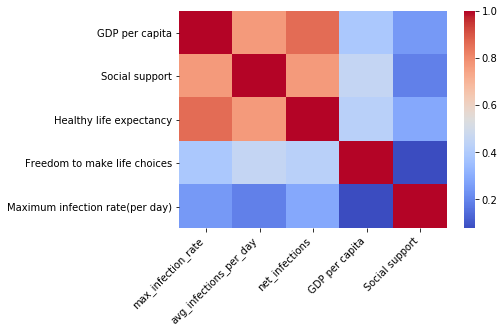

In [67]:
ax1 = sns.heatmap(max_inf_rate_vs_dev_index.corr(), cmap = 'coolwarm')
ax1.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [56]:
avg_infections_vs_dev_index.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Average infections per day
Afghanistan,0.350,0.517,0.361,0.000,21.71
Albania,0.947,0.848,0.874,0.383,7.73
Algeria,1.002,1.160,0.785,0.086,40.06
Argentina,1.092,1.432,0.881,0.471,44.28
Armenia,0.850,1.055,0.815,0.283,20.66


In [57]:
avg_infections_vs_dev_index.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Average infections per day
GDP per capita,1.000000,0.767286,0.860355,0.389718,0.327523
Social support,0.767286,1.000000,0.767911,0.457708,0.239413
Healthy life expectancy,0.860355,0.767911,1.000000,0.423701,0.339961
Freedom to make life choices,0.389718,0.457708,0.423701,1.000000,0.028763
Average infections per day,0.327523,0.239413,0.339961,0.028763,1.000000


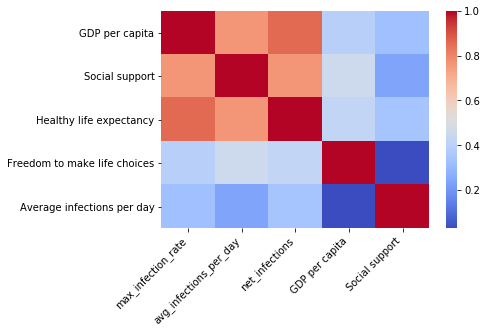

In [66]:
ax2 = sns.heatmap(avg_infections_vs_dev_index.corr(), cmap = 'coolwarm')
ax2.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [58]:
inf_per_capita_vs_dev_index.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Net infections per million people
Afghanistan,0.350,0.517,0.361,0.000,55.769130
Albania,0.947,0.848,0.874,0.383,268.608244
Algeria,1.002,1.160,0.785,0.086,91.354724
Argentina,1.092,1.432,0.881,0.471,97.973762
Armenia,0.850,1.055,0.815,0.283,697.209105


In [59]:
inf_per_capita_vs_dev_index.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Net infections per million people
GDP per capita,1.000000,0.767286,0.860355,0.389718,0.607346
Social support,0.767286,1.000000,0.767911,0.457708,0.441701
Healthy life expectancy,0.860355,0.767911,1.000000,0.423701,0.556944
Freedom to make life choices,0.389718,0.457708,0.423701,1.000000,0.281343
Net infections per million people,0.607346,0.441701,0.556944,0.281343,1.000000


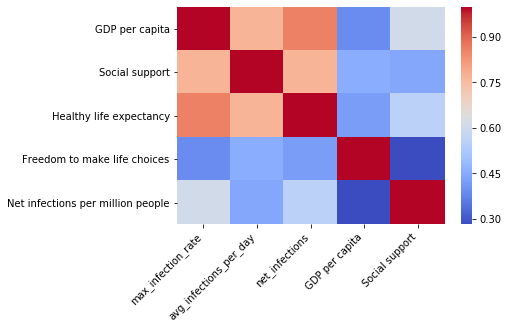

In [65]:
ax3 = sns.heatmap(inf_per_capita_vs_dev_index.corr(), cmap = 'coolwarm')
ax3.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [60]:
## We see that there is a ositive correlation between 'net development index and standard of living of a country' 
## and the rate of infections. This may be attributed to increased testing, contact tracing and population density
## in these countries.  